### Import Torch

In [1]:
import torch

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### Download CIFAR-10 dataset

In [2]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.CIFAR10(
    root = './data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.CIFAR10(
    root = './data', 
    train = False, 
    transform = ToTensor()
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


### Visualize CIFAR-10 dataset

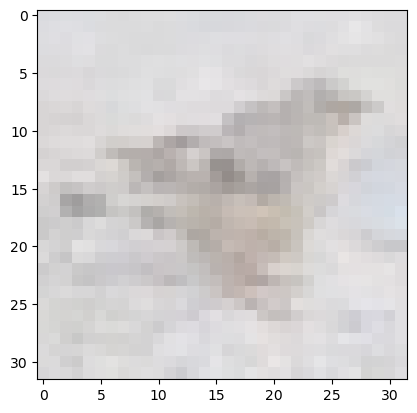

bird


In [3]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

sample_idx = torch.randint(len(train_data), size=(1,)).item()
img, label = train_data[sample_idx]
imshow(torchvision.utils.make_grid(img))
print(f'{classes[label]}')

### Split the training dataset into training and validation datasets

In [4]:
from sklearn.model_selection import train_test_split

# your code here
train_data, val_data = train_test_split(train_data, test_size = 0.1, random_state = 123, shuffle = True)
train_data[0][0].size()


torch.Size([3, 32, 32])

### Prepare for the datasets using dataloader

In [5]:
from torch.utils.data import DataLoader

loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    'val'  : torch.utils.data.DataLoader(val_data, 
                                          batch_size=100, 
                                          shuffle=False, 
                                          num_workers=1),
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=False, 
                                          num_workers=1),
}

### Import nn module from torch

In [6]:
from torch import nn
import torch.nn.functional as F

### Set hyperparameters

In [7]:
# Set hyperparameters before building the model
num_classes = 10
batch_size = 100
num_epochs = 10
learning_rate = 0.01 

### Build a CNN model for image classification task

In [12]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()        
        # your code here
        self.c1 = nn.Conv2d(3, 32, 3, padding=1)
        self.c2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.l1 = nn.Linear(64*8*8, 128)
        self.l2 = nn.Linear(128, 10)
                
    def forward(self, x):
        # your code here
        x = self.c1(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = self.c2(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = x.view(-1, 64*8*8)
        x = self.l1(x)
        x = nn.functional.relu(x)
        x = self.l2(x)
        
        return x# your code here
        

model = CNN(num_classes).to(device)
print(model)

CNN(
  (c1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (c2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (l1): Linear(in_features=4096, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
)


### Set a loss function

In [13]:
loss_func = nn.CrossEntropyLoss().to(device)  # your code here

### Set an optimizer

In [14]:
from torch import optim
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # your code here

### Train the CNN Model

In [15]:
def train(num_epochs, model, loaders):
        
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        # Train the model
        # your code here
        total_loss = 0.0
        for image, label in loaders['train']:
            output = model(image)
            #label = label.to(device) #GPU 있으면 필요있는 코드?
            loss = loss_func(output, label)
            total_loss += loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print("total_loss = ", total_loss)

                
        # Validate the model
        # your code here
        with torch.no_grad():
            total_right = 0
            for image, label in loaders['val']:
                output = model(image)
                #label = label.to(device)
                right = (output.max(1)[1] == label).sum()
                total_right += right
            print(total_right / len(loaders['val'].dataset))
        
        
        
train(num_epochs, model, loaders)

total_loss =  tensor(750.7509, grad_fn=<AddBackward0>)
tensor(0.4976)
total_loss =  tensor(581.1926, grad_fn=<AddBackward0>)
tensor(0.5582)
total_loss =  tensor(527.9825, grad_fn=<AddBackward0>)
tensor(0.5696)
total_loss =  tensor(495.3318, grad_fn=<AddBackward0>)
tensor(0.5744)
total_loss =  tensor(479.2863, grad_fn=<AddBackward0>)
tensor(0.5922)
total_loss =  tensor(465.3440, grad_fn=<AddBackward0>)
tensor(0.5852)
total_loss =  tensor(453.3148, grad_fn=<AddBackward0>)
tensor(0.6028)
total_loss =  tensor(433.6369, grad_fn=<AddBackward0>)
tensor(0.6098)
total_loss =  tensor(425.9174, grad_fn=<AddBackward0>)
tensor(0.5924)
total_loss =  tensor(418.7503, grad_fn=<AddBackward0>)
tensor(0.5730)


### Evaluate the trained CNN model (compute accuracy on the test dataset)

In [16]:
# Test the model
# your code here
with torch.no_grad():
    total_right = 0
    for image, label in loaders['test']:
        output = model(image)
        label = label.to(device)
        right = (output.max(1)[1] == label).sum()
        total_right += right
    print(f"average accuracy : {total_right/len(loaders['test'].dataset)}")

average accuracy : 0.5720999836921692


### Show the results with randomly selected 10 samples from the test data

In [17]:
sample = next(iter(loaders['test']))
imgs, lbls = sample
imgs = imgs
lbls = lbls
test_output = model(imgs[:10])
predicted = torch.max(test_output, 1)[1].data.cpu().numpy().squeeze()
labels = lbls[:10].cpu().numpy()
print(f"Predicted number: {predicted}")
print(f"Actual number:    {labels}")

Predicted number: [3 8 9 8 6 6 1 6 3 1]
Actual number:    [3 8 8 0 6 6 1 6 3 1]
